In [94]:
# Load data and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
directory_path = os.getcwd() + "\\Data\\sorting_event_volumes_2023.csv"

df = pd.read_csv(directory_path)


In [95]:
# Data cleaning
print("Number of rows is: " + str(df.shape[0]))

df = df.loc[df["event_type"] == "LAJ", :]
df.drop(['event_location', 'input_belt', 'position'], axis=1, inplace = True)
df.dropna(inplace = True)
df['output_belt'] = df['output_belt'].astype(int)
df['scanning_date'] = pd.to_datetime(df['scanning_date'])

print("Number of rows cleaned data is: " + str(df.shape[0]))

Number of rows is: 8949721
Number of rows cleaned data is: 7450939


In [96]:
# Data preparation
df['day'] = df['scanning_date'].dt.day
df['month'] = df['scanning_date'].dt.month
df['weekday'] = df['scanning_date'].dt.day_of_week + 1
df['week'] = df['scanning_date'].dt.day_of_year // 7 + 1
df['yearday'] = df['scanning_date'].dt.day_of_year
df['yearday_sin'] = np.sin(df['yearday'] / 7 * 2 * np.pi)
df['yearday_cos'] = np.cos(df['yearday'] / 7 * 2 * np.pi)

sorting_center_names = df["sorting_center_name"].unique()
df["sorting_center_name"].value_counts()

VANTAA       4888466
TAMPERE      1154436
KUOPIO        578274
LIETO         443087
OULU          354047
SEINÄJOKI      32629
Name: sorting_center_name, dtype: int64

In [97]:
df

,sorting_center_name,event_type,scanning_date,output_belt,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
16791,VANTAA,LAJ,2023-01-02,1,13,2,1,1,1,2,0.974928,-0.222521
16792,VANTAA,LAJ,2023-01-02,10,4,2,1,1,1,2,0.974928,-0.222521
16793,VANTAA,LAJ,2023-01-02,10,2,2,1,1,1,2,0.974928,-0.222521
16794,VANTAA,LAJ,2023-01-02,10,7,2,1,1,1,2,0.974928,-0.222521
16795,VANTAA,LAJ,2023-01-02,10,3,2,1,1,1,2,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...
8789785,OULU,LAJ,2023-12-27,0,105,27,12,3,52,361,-0.433884,-0.900969
8789786,OULU,LAJ,2023-12-27,0,707,27,12,3,52,361,-0.433884,-0.900969
8789787,OULU,LAJ,2023-12-28,0,3,28,12,4,52,362,-0.974928,-0.222521
8789788,OULU,LAJ,2023-12-28,0,792,28,12,4,52,362,-0.974928,-0.222521


In [6]:
#aggregating data
adf = df.groupby(['scanning_date','sorting_center_name'])['no_of_events'].sum().reset_index()
adf['day'] = adf['scanning_date'].dt.day
adf['month'] = adf['scanning_date'].dt.month
adf['weekday'] = adf['scanning_date'].dt.day_of_week + 1
adf['week'] = adf['scanning_date'].dt.day_of_year // 7 + 1
adf['yearday'] = adf['scanning_date'].dt.day_of_year
adf['yearday_sin'] = np.sin(adf['yearday'] / 7 * 2 * np.pi)
adf['yearday_cos'] = np.cos(adf['yearday'] / 7 * 2 * np.pi)
adf

,scanning_date,sorting_center_name,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
0,2023-01-01,LIETO,3650,1,1,7,1,1,7.818315e-01,0.623490
1,2023-01-01,OULU,1441,1,1,7,1,1,7.818315e-01,0.623490
2,2023-01-01,TAMPERE,1458,1,1,7,1,1,7.818315e-01,0.623490
3,2023-01-02,KUOPIO,23812,2,1,1,1,2,9.749279e-01,-0.222521
4,2023-01-02,LIETO,44598,2,1,1,1,2,9.749279e-01,-0.222521
...,...,...,...,...,...,...,...,...,...,...
1876,2023-12-29,OULU,19831,29,12,5,52,363,-7.818315e-01,0.623490
1877,2023-12-29,SEINÄJOKI,15100,29,12,5,52,363,-7.818315e-01,0.623490
1878,2023-12-29,TAMPERE,34499,29,12,5,52,363,-7.818315e-01,0.623490
1879,2023-12-29,VANTAA,129349,29,12,5,52,363,-7.818315e-01,0.623490


In [7]:
#missing dates: 9 april, 24 june, 24 dec, 25 dec, 31 dec

In [8]:
#import plotly.express as px
#fig_weekday = px.histogram(df.weekday,x='weekday')
#fig_weekday.update_layout(bargap=0.2)
#fig_weekday.show()

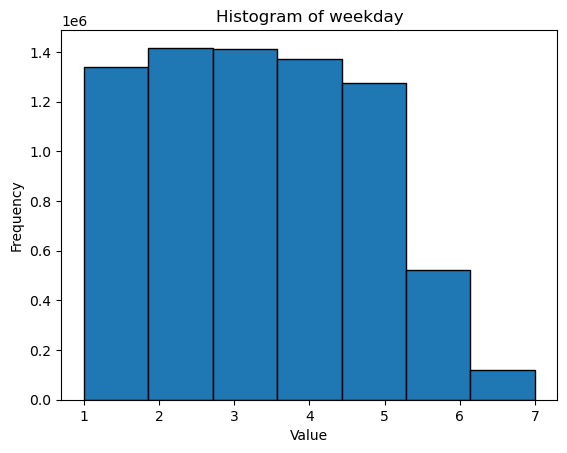

In [9]:
# Create the histogram
plt.hist(df['weekday'], bins=7, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of weekday')

# Show the plot
plt.show()

              no_of_events
no_of_events      1.000000
day               0.021900
month             0.050323
weekday          -0.289534
week              0.049091
yearday           0.052139
yearday_sin      -0.100394
yearday_cos      -0.240350


C:\Users\krist\AppData\Local\Temp\ipykernel_32208\4022224248.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_covariance_matrix = adf.corr()[['no_of_events']]


<Axes: >

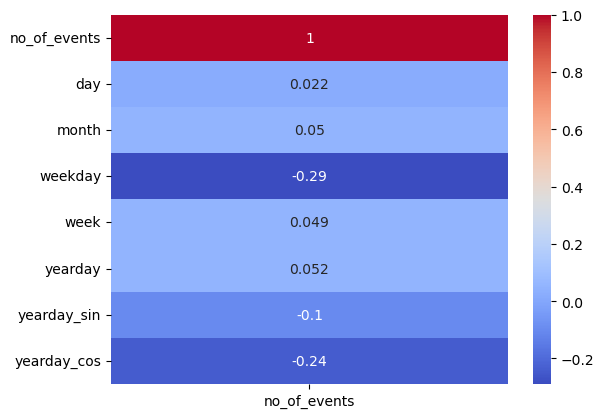

In [10]:
import seaborn as sns
#determine correlations
target_covariance_matrix = adf.corr()[['no_of_events']]
print(target_covariance_matrix)
sns.heatmap(target_covariance_matrix,annot=True, cmap='coolwarm')

In [11]:
X = adf[['week','day','weekday']]
y = adf['no_of_events']

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
#print coefficient values for unstandardized model
print(model.coef_)
print(model.intercept_)

[  183.35184434    51.27938877 -7192.42932543]
64133.30543567074


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X)
# Calculate metrics
r_squared = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Print the metrics
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.0873
Mean Absolute Error: 31185.0597
Mean Squared Error: 2071221522.4148
Root Mean Squared Error: 45510.6748


In [15]:
#standardize the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()

# Fit the model to the standardized data
model.fit(X_scaled, y)


LinearRegression()

In [16]:
#coefficients of the standardized multiple regression model
print(['week','day','weekday'])
print(model.coef_)

['week', 'day', 'weekday']
[  2763.27309343    449.08249896 -13868.7931668 ]


In [59]:
vantaa = adf[adf['sorting_center_name']=='VANTAA']
vantaa

,scanning_date,sorting_center_name,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
8,2023-01-02,VANTAA,140723,2,1,1,1,2,9.749279e-01,-0.222521
14,2023-01-03,VANTAA,154829,3,1,2,1,3,4.338837e-01,-0.900969
20,2023-01-04,VANTAA,160294,4,1,3,1,4,-4.338837e-01,-0.900969
26,2023-01-05,VANTAA,144020,5,1,4,1,5,-9.749279e-01,-0.222521
28,2023-01-06,VANTAA,18913,6,1,5,1,6,-7.818315e-01,0.623490
...,...,...,...,...,...,...,...,...,...,...
1861,2023-12-26,VANTAA,119,26,12,2,52,360,4.338837e-01,-0.900969
1867,2023-12-27,VANTAA,144831,27,12,3,52,361,-4.338837e-01,-0.900969
1873,2023-12-28,VANTAA,152030,28,12,4,52,362,-9.749279e-01,-0.222521
1879,2023-12-29,VANTAA,129349,29,12,5,52,363,-7.818315e-01,0.623490


In [60]:


# Create lag features (e.g., lag 1, lag 2)
def create_lag_features(series, lags):
    lagged_data = pd.DataFrame()
    for lag in range(1, lags+1):
        lagged_data[f'lag_{lag}'] = series.shift(lag)
    return lagged_data

# Create features and target
lags = 2  # You can change the number of lags
X = create_lag_features(vantaa['no_of_events'], lags)
X.dropna(inplace=True)
y = vantaa['no_of_events'][lags:]  # Target variable is the actual series shifted by the number of lags
dates = vantaa['scanning_date'][lags:]  # Corresponding dates for the target

# Split the data into train and test sets
X_train, X_rest, y_train, y_rest, dates_train, dates_rest = train_test_split(
    X, y, dates, test_size=0.25, shuffle=False
)
X_test, X_drop, y_test, y_drop, dates_test, dates_drop = train_test_split(
    X_rest, y_rest, dates_rest, test_size=0.8, shuffle=False
)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test RMSE: {rmse}")
print("Predictions:", y_pred)
print(dates_test)

Test RMSE: 51643.035892573906
Predictions: [119574.00628964 118245.87354968 117839.03036996  79488.13190666
  95515.99842552 179886.50634983 123616.82340146 117359.04609892
 123396.32937573 115848.34965761  81746.40013745  93559.85837547
 180879.81880605 129369.84862612 112382.8506073  115673.08283474
 118805.33665198]
1423   2023-10-05
1429   2023-10-06
1431   2023-10-07
1437   2023-10-08
1443   2023-10-09
1449   2023-10-10
1455   2023-10-11
1461   2023-10-12
1467   2023-10-13
1468   2023-10-14
1473   2023-10-15
1479   2023-10-16
1485   2023-10-17
1491   2023-10-18
1497   2023-10-19
1503   2023-10-20
1504   2023-10-21
Name: scanning_date, dtype: datetime64[ns]


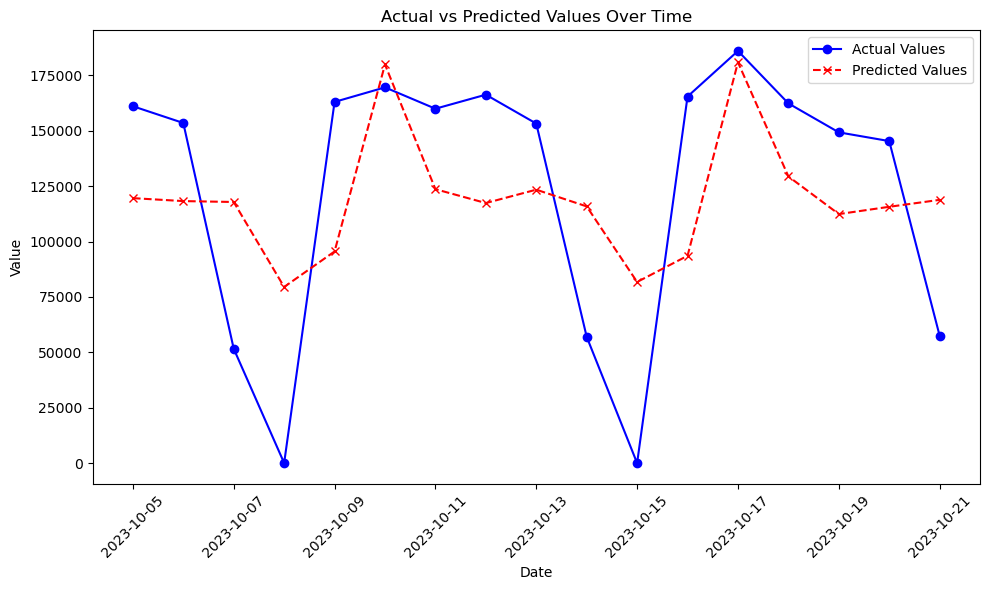

In [61]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(dates_test, y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(dates_test, y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [91]:
df

,sorting_center_name,event_type,scanning_date,output_belt,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
16791,VANTAA,LAJ,2023-01-02,1,13,2,1,1,1,2,0.974928,-0.222521
16792,VANTAA,LAJ,2023-01-02,10,4,2,1,1,1,2,0.974928,-0.222521
16793,VANTAA,LAJ,2023-01-02,10,2,2,1,1,1,2,0.974928,-0.222521
16794,VANTAA,LAJ,2023-01-02,10,7,2,1,1,1,2,0.974928,-0.222521
16795,VANTAA,LAJ,2023-01-02,10,3,2,1,1,1,2,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...
8789785,OULU,LAJ,2023-12-27,0,105,27,12,3,52,361,-0.433884,-0.900969
8789786,OULU,LAJ,2023-12-27,0,707,27,12,3,52,361,-0.433884,-0.900969
8789787,OULU,LAJ,2023-12-28,0,3,28,12,4,52,362,-0.974928,-0.222521
8789788,OULU,LAJ,2023-12-28,0,792,28,12,4,52,362,-0.974928,-0.222521


In [98]:
df = df.groupby(['sorting_center_name', 'scanning_date', 'output_belt'], as_index = False)['no_of_events'].sum()

In [99]:
df

,sorting_center_name,scanning_date,output_belt,no_of_events
0,KUOPIO,2023-01-02,0,1439
1,KUOPIO,2023-01-02,601,552
2,KUOPIO,2023-01-02,602,695
3,KUOPIO,2023-01-02,603,187
4,KUOPIO,2023-01-02,604,395
...,...,...,...,...
188623,VANTAA,2023-12-30,96,956
188624,VANTAA,2023-12-30,97,692
188625,VANTAA,2023-12-30,98,929
188626,VANTAA,2023-12-30,99,47


In [108]:
#calculate per chute
def lingres(center,belt):
    chute = df[(df['sorting_center_name'] == center) & (df['output_belt'] == belt)]
    lags = 2  # You can change the number of lags
    X = create_lag_features(chute['no_of_events'], lags)
    X.dropna(inplace=True)
    y = chute['no_of_events'][lags:]  # Target variable is the actual series shifted by the number of lags
    dates = chute['scanning_date'][lags:]  # Corresponding dates for the target

    # Split the data into train and test sets
    X_train, X_rest, y_train, y_rest, dates_train, dates_rest = train_test_split(
        X, y, dates, test_size=0.25, shuffle=False
    )
    X_test, X_drop, y_test, y_drop, dates_test, dates_drop = train_test_split(
        X_rest, y_rest, dates_rest, test_size=0.8, shuffle=False
    )

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    rmse_per_day = np.sqrt((y_test - y_pred) ** 2)
    mae_per_day = np.abs(y_test - y_pred) 
    return rmse, mae
lingres('VANTAA', 90)

(712.7799021785836, 679.29517859426)

In [109]:
sorting_centers = df['sorting_center_name'].unique()

for c in range(len(sorting_centers)):
    belts = df[(df['sorting_center_name'] == sorting_centers[c])]['output_belt'].unique()
    rmse_avg = []
    mae_avg = []
    for b in range(len(belts)):
        rmse_avg.append(lingres(sorting_centers[c],belts[b])[0])
        mae_avg.append(lingres(sorting_centers[c],belts[b])[1])
    print('The average rmse for sorting center ' + sorting_centers[c] + ' is '+ str(np.average(rmse_avg)))
    print('The average mae for sorting center ' + sorting_centers[c] + ' is '+ str(np.average(mae_avg)))

The average rmse for sorting center KUOPIO is 54.440570751707604
The average mae for sorting center KUOPIO is 39.92033703590762
The average rmse for sorting center LIETO is 113.07900735340162
The average mae for sorting center LIETO is 89.51815923826976
The average rmse for sorting center OULU is 85.56416187680705
The average mae for sorting center OULU is 72.30007683728599
The average rmse for sorting center SEINÄJOKI is 133.36481500477964
The average mae for sorting center SEINÄJOKI is 98.67266352942235
The average rmse for sorting center TAMPERE is 105.0813545622348
The average mae for sorting center TAMPERE is 81.09063528373798
The average rmse for sorting center VANTAA is 338.7157892202026
The average mae for sorting center VANTAA is 286.82935258990096
